In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
import os
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('three_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
quality       0
dtype: int64
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'quality']


In [11]:
x = df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11']].values.reshape(-1,11)
y = df['quality'].values.reshape(-1,1)

sc= MinMaxScaler()
x = sc.fit_transform(x)
yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)
jb.dump(sc, 'three_scaler.pkl')

['three_scaler.pkl']

In [14]:
def prob(one,two,three,four,five,six,seven,eight,nine,ten,eleven):
    inp = np.array([[one,two,three,four,five,six,seven,eight,nine,ten,eleven]], dtype=float)
    model_path = 'three.keras'
    sc =jb.load('three_scaler.pkl')
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(11,), activation='tanh'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x, y, epochs=500)
        model.save('three.keras')
        lv = hist.history['loss']
        pred = model.predict(x)

        plt.figure()
        plt.plot(lv)
        plt.title('Loss Values')
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.title('Actual vs predicted')
        plt.scatter(y, pred, label= 'actual vs predicted', color='pink')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.grid(True)
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx-yn)+yn

Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2889
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0515
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0226
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073
Epoch 12/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069
Epoch 13/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070
Epoch 14/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066
Epoch 15/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060
Epoch 16/500
32/

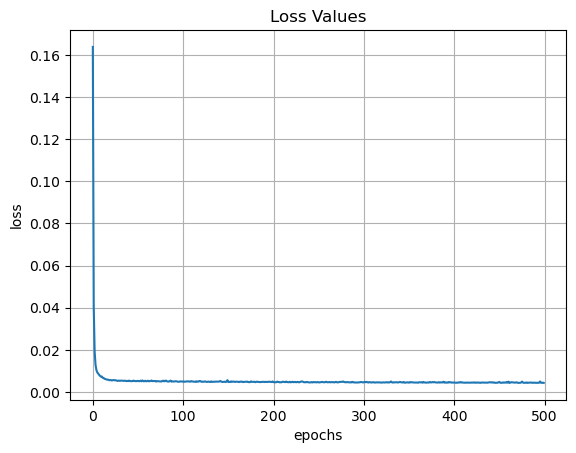

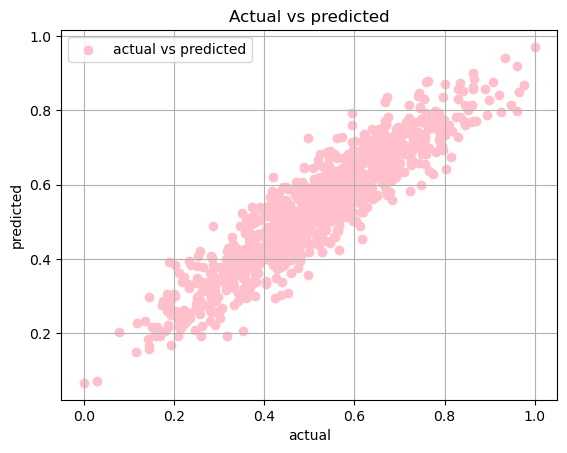

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
7.299338181049556


In [15]:
print(prob(1,2,3,4,5,6,7,8,9,10,11))